<h1> Maximum de Vraisemblance, Régression Linéaire, Zones de Confiance et Traitement de Data Massives Collectées. </h1>

- Nom Complet: 
	- Ibrahim Lahlou
	- Fatima azzahra Ettarfi


Maximum de Vraisemblance, Régression Linéaire, Zones de Confiance et Traitement de Data Massives Collectées

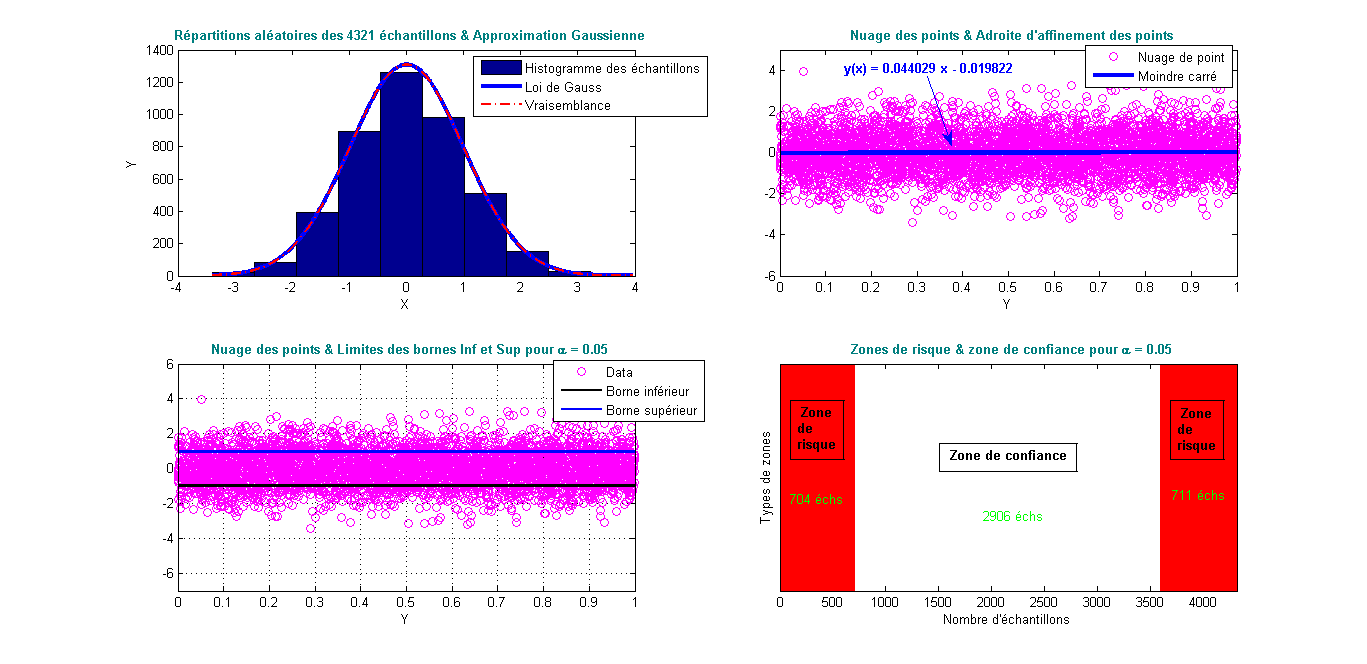

<font color="purple">
    <h2 >Question 1 : Génération alétoires de données massives</h2>
</font>

In [1]:
#L'installation d'anaconda vous fournira tout les bibliothèque nécessaire pour la data Science
import numpy as np
import matplotlib.pyplot as plt

def box_muller(n):
    U1 = np.random.uniform(0, 1, n)
    U2 = np.random.uniform(0, 1, n)

    R = np.sqrt(-2 * np.log(np.where(U1 > 0, U1, 1e-10)))  # Replace 0 values with a small epsilon (1e-10)

    Theta = 2 * np.pi * U2
    Z = R * np.cos(Theta)

    return Z


L'algorithme de Box-Muller permet de générer des variables aléatoires normalement distribuées en utilisant les variables $U_1$ et $U_2$ comme suit :

\begin{align*}
R &= \sqrt{-2 \log(U_1)}, \\
\Theta &= 2\pi U_2, \\
Z &= R \cos(\Theta).
\end{align*}

La variable aléatoire $Z$ obtenue ainsi suit une distribution normale standard.


Sachant que $U_1, U_2, \ldots$ une séquence de variables aléatoires indépendantes et identiquement distribuées selon une loi normale standard.

<h5>  1.1 Génération des données </h5>

In [2]:
#n = int(input("Éntrer le nombre d’échantillons à tester = "))
#alpha = float(input("Éntrer la valeur de alpha paramètre (comprise entre 0 et 1) = ")) 
#var = float(input("Éntrer la valeur attribuée à la variance (entre 0 et 1) = "))
#X = box_muller(n)
#Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)

<h5> 1.2 Les histogrammes des data massives générées correspondant aux nombres n = 20, 50, 300, 1000 et 7000 </h5>

In [3]:
def visualize_histograms(X,Y,n, alpha, var):
    X = box_muller(n)
    Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)
    
    # Affichage de l'histogramme
    plt.hist(Y, bins='auto', alpha=alpha, color='blue')
    
    # Affichage du texte indiquant le nombre d'échantillons
    plt.text(0.5, -0.2, f"Histogrammes des données massives générées correspondant à n = {n}",
             horizontalalignment='center', transform=plt.gca().transAxes)
    
    # Ajout des points sous forme de cercles vides
    plt.scatter(X, Y, marker='o', facecolors='none', edgecolors='red')
  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f"Histogrammes des données massives générées correspondant à n = {n}")
    
    plt.grid(True)
    plt.show()

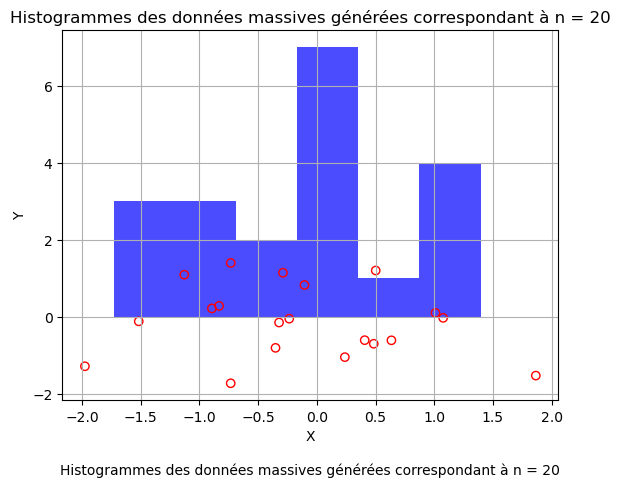

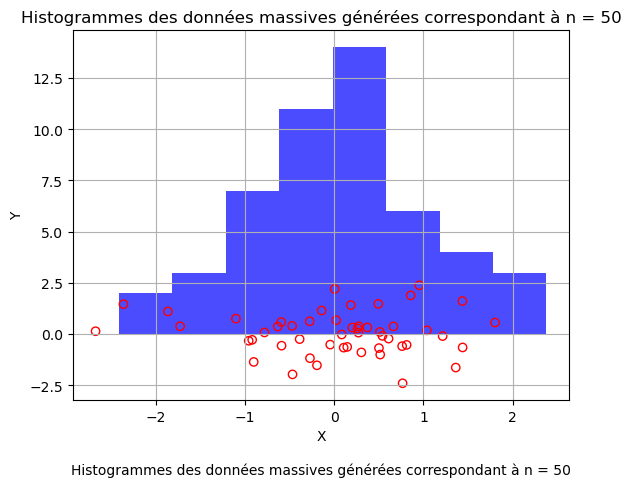

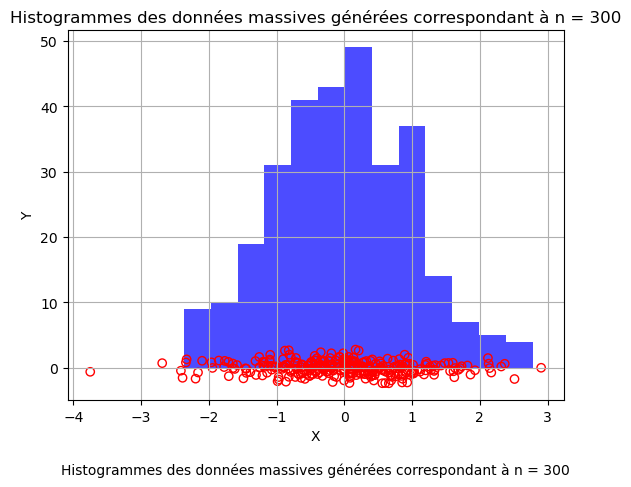

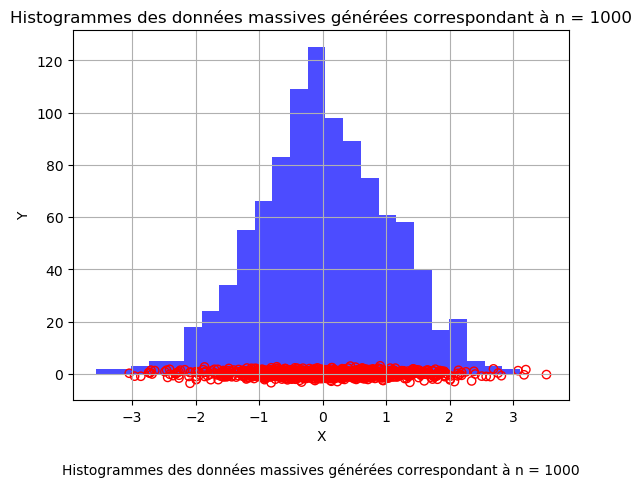

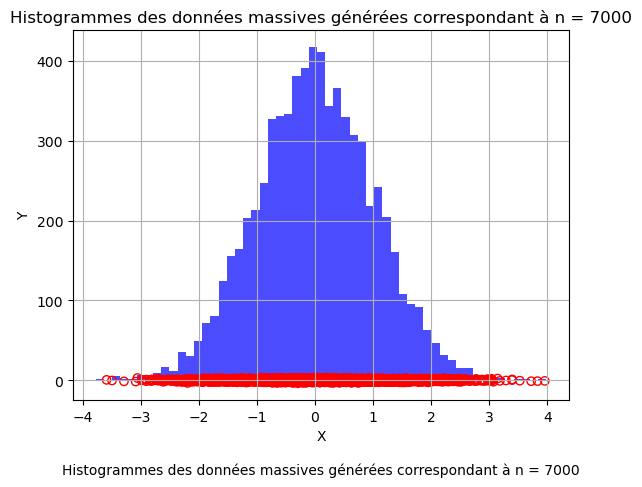

In [4]:
lst = [20,50,300,1000,7000]

alpha =0.7
var = 0.5

for n in lst:
    X = box_muller(n)
    Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)
    visualize_histograms(X,Y,n, alpha, var)

<font color="green" ><h4>Intérprétation :</h4></font>

On Observe que plus on agglomére un grands nombre d'échantillons ensemble ,la distribution tend à ressembler à celle de la loi normal

<font color="green" ><h4>Demonstration Mathématique:</h4></font>

\begin{align*}
X_1, X_2, \ldots, X_n & \text{ i.i.d. avec moyenne } \mu \text{ et variance } \sigma^2.\\
S_n &= X_1 + X_2 + \ldots + X_n.\\
E[S_n] &= n\mu, \quad \text{Var}(S_n) = n\sigma^2.\\
\text{Selon le théorème central limite,} \\
\lim_{{n \to \infty}} \frac{{S_n - n\mu}}{{\sqrt{n\sigma^2}}} &\approx \text{Distribution normale}.
\end{align*}

<font color="green" ><h4>Conclusion :</h4></font>

Cela démontre que lorsque le nombre d'échantillons 

n devient très grand, la somme des échantillons $S_n$
  tend à se rapprocher d'une distribution normale avec une moyenne de $\mu$
nμ et une variance de 2nσ 

<font color="purple">
    <h2 >Question 2 : Comparaison des données générées avec la distribution Normale N(μ,σ).</h2>
</font>

$$X=boxmuller(n) \\ Y=\alpha*boxmuller(n) +\sigma*\epsilon$$

<h5>2.1 Affichage des valeurs, de la moyenne
$\mu$ et de l’écart-type $\sigma$</h5>

In [26]:
import numpy as np

np.random.seed(123)
alpha =0.7
var = 0.5
n=40000
X = box_muller(n)
Y = alpha * box_muller(n) + np.sqrt(var) * np.random.randn(n)

stat = {
    "Moyenne de Y": np.mean(Y),
    "Écart-type de Y": np.std(Y),
    "Point du centre de données G": [np.mean(X), np.mean(Y)]
}

for key, value in stat.items():
    print(f"{key}: {value}")

np.mean(Y)

Moyenne de Y: 0.009519058385263275
Écart-type de Y: 0.9944089310188535
Point du centre de données G: [0.0014433561204465106, 0.009519058385263275]


0.009519058385263275

<h5>2.2 Estimation des valeurs, de la moyenne
$\mu$ et de l’écart-type $\sigma$ pour X et Y </h5>

L'estimation des distributions normales pour les données Y et X est réalisée en utilisant les paramètres de la moyenne et de l'écart-type. Ces paramètres caractérisent la forme de la distribution normale et permettent de comparer les données observées avec cette distribution théorique.

In [28]:
from scipy.stats import norm 

dist = {
'y' : norm.fit(Y) ,
'x' : norm.fit(X)
}

print("\nFitted Normal distribution for Y (moyenne , écart-type): \n----------------------------------------\n",dist['y']) 
print("\nFitted Normal distribution for X (moyenne , écart-type):\n----------------------------------------\n", dist['x']) 


dist['y'][0]



Fitted Normal distribution for Y (moyenne , écart-type): 
----------------------------------------
 (0.009519058385263275, 0.9944089310188535)

Fitted Normal distribution for X (moyenne , écart-type):
----------------------------------------
 (0.0014433561204465106, 0.9957638516475352)


0.009519058385263275

<font color="green" ><h4>Interprétation :</h4></font>

On constate que les moyennes qui découlent de Ajustement de la distribution de données normale sont égale à la moyenne d'origine

<h5>2.2 Estimation des valeurs, de la moyenne
$\mu$ et de l’écart-type $\sigma$ pour X et Y </h5>

Comme X est un V.A qui suit la loi de Gauss a une fonction de densité  de  proba qui s'ecrit sous la forme
$$f_x(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-(\frac{x-\mu}{\sqrt{2}\sigma})^2}=K.E(x)$$

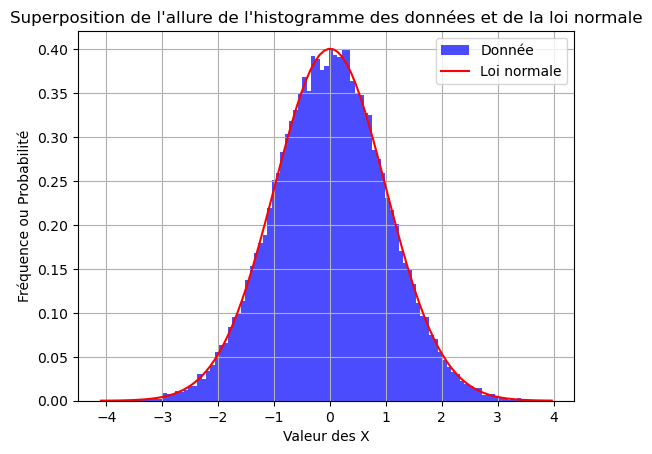

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def MMSE_viz_TCL(X):

    mean = np.mean(X)
    std = np.std(X)

    # Affichage de l'histogramme des données
    plt.hist(X, bins='auto', color='blue', alpha=0.7, density=True , label = 'Donnée')

    x = np.linspace(np.min(X), np.max(X), 100)
    E = lambda x:np.exp(-0.5 * ((x - mean) / std) ** 2)
    K =  1 / (std * np.sqrt(2 * np.pi)) 
    y = K*E(x)

    # Affichage de la courbe de la loi normale
    plt.plot(x, y, color='red', label='Loi normale')

    plt.xlabel('Valeur des X')
    plt.ylabel('Fréquence ou Probabilité')
    plt.title("Superposition de l'allure de l'histogramme des données et de la loi normale")
    plt.legend()
    plt.grid(True)
    plt.show()


MMSE_viz_TCL(X)


<font color="green" ><h4>Interprétation :</h4></font>

Les données massives générées suivent bien la distribution de la loi normale centrée réduite.

<font color="green" ><h4>Test de Normalité :</h4></font>

In [31]:
statistic, p_value = stats.normaltest(X) 

# Afficher les résultats
alpha = 0.05  # Niveau de signification
print("Résultats du test de normalité:")
print(f"Statistique du test: {statistic}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Les données ne suivent pas une distribution normale.")
else:
    print("Les données suivent une distribution normale.")

Résultats du test de normalité:
Statistique du test: 0.19909498144031987
P-value: 0.9052469580177002
Les données suivent une distribution normale.


<font color="purple">
    <h2 >Question 3 : Estimation par Maximum de Vraisemblance (Maximum Likelihood Estimation). </h2>
</font>

<h5>3.1 Estimateurs de μ et σ par la méthode de maximum de vraisemblance</h5>


Estimation par maximum de vraisemblance

Soit $(X_i \sim \text{Poisson}(\theta))$, où $(\theta)$ est le paramètre à estimer.
$$
X  \approx \epsilon(1/\mu) = \begin{cases} 0 & \text{si } x < 0 \\ x & \text{si } x \geq 0 \end{cases}
$$

$$
L_\theta(x_1,x_2,\dots,x_n) = \prod\limits_{i=1}^{n}{P(x=x_i)} = \frac{1}{\mu} e^{-\sum\limits_{i=1}^{n}x_i/n}
$$

Pour résoudre $\theta$, on cherche :
$$
\widehat{\theta_{MV}} = \arg\max_{\theta} L(\theta)
$$
Ce qui revient à résoudre :
$$
\frac{dL(\theta)}{d\theta} = 0 \quad \text{et} \quad \frac{d^2L(\theta)}{d\theta^2} < 0
$$
On obtient :
$$
\widehat{\theta_{MV}} = \frac{\sum\limits_{i=1}^{n}x_i}{n}
$$


Essayant d'estimer la valeur de $\mu$ et $\sigma$ avec leurs intervalles de confiances


$$
\text{Intervalle de confiance (95\%) pour la moyenne : } \bar{X} \pm z \left(\frac{\sigma}{\sqrt{n}}\right)
$$

$$
\text{Intervalle de confiance (95\%) pour l'écart-type : } s \pm z \left(\frac{s}{\sqrt{2(n-1)}}\right)
$$


In [13]:
mean_MV, std_MV = stats.norm.fit(Y) # Similaire a la commandes

print("Estimation des paramètres par maximum de vraisemblance (MV):")
print("Moyenne MV:", mean_MV)
print("Intervalle de confiance (95%) de la moyenne MV:", stats.norm.interval(0.95, loc=mean_MV, scale=std_MV/np.sqrt(n)))
print("Écart-type MV:", std_MV)
print("Intervalle de confiance (95%) de l'écart-type MV:", stats.norm.interval(0.95, loc=std_MV, scale=std_MV/np.sqrt(2*(n-1))))

Estimation des paramètres par maximum de vraisemblance (MV):
Moyenne MV: 0.0013761312213001092
Intervalle de confiance (95%) de la moyenne MV: (-0.00834822519719752, 0.011100487639797738)
Écart-type MV: 0.9922995009298246
Intervalle de confiance (95%) de l'écart-type MV: (0.9854232566100387, 0.9991757452496104)


<h5>3.2 Comparaison </h5>

si on calcule la différence entre la valeurs estimé par la méthode de maximum de vraisemblance et l'estimation par ajustement à la distribution normal nous trouvons que la valeurs est trés petite à l'ordre de $10^{-3}$

In [46]:
print("Normal dist \t     |Maximum de vraisemblance")
print("----------------------------------------------")
print(dist['y'][0],"|",mean_MV)
print(dist['y'][1],"  |",std_MV)

Normal dist 	     |Maximum de vraisemblance
----------------------------------------------
0.009519058385263275 | 0.0013761312213001092
0.9944089310188535   | 0.9922995009298246


3.3 

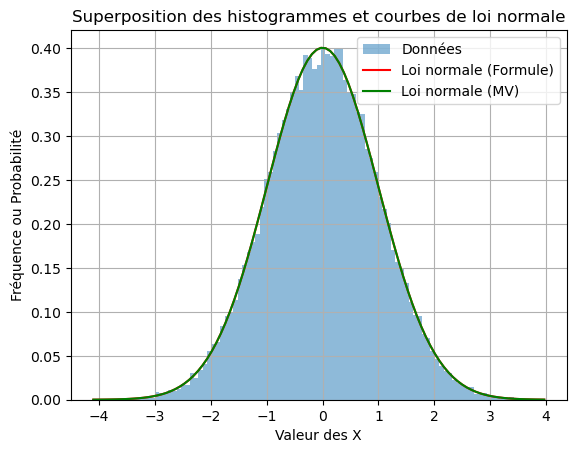

In [52]:
def MLE_viz_TCL(X):
    mean_MV, std_MV = stats.norm.fit(X)

    mean_formula = np.mean(X)
    std_formula = np.std(X)

    plt.hist(X, bins='auto', density=True, alpha=0.5, label='Données')
    x = np.linspace(np.min(X), np.max(X), 100)
    plt.plot(x, stats.norm.pdf(x, loc=mean_formula, scale=std_formula), 'r-', label='Loi normale (Formule)')
    plt.plot(x, stats.norm.pdf(x, loc=mean_MV, scale=std_MV), 'g-', label='Loi normale (MV)')
    plt.xlabel('Valeur des X')
    plt.ylabel('Fréquence ou Probabilité')
    plt.title('Superposition des histogrammes et courbes de loi normale')
    plt.legend()
    plt.grid(True)
    plt.show()
    
MLE_viz_TCL(X)


<font color="green" ><h4>Interprétation :</h4></font>

Les allures déduit de la méthode de maximum de vraisemblances se raccordent bien avec la distribution normale ce qui justifie le faite que cette méthode est fiable pour estimer les paramètres d'un modèle statistique à partir des données observées.


<font color="purple">
    <h2 >Question 4 : Estimation par Moindre Carré (Least Squares) et Régression linéaire. </h2>
</font>

In [59]:
P = np.polyfit(X.flatten(), Y, 1) 
beta1,beta0 = P[0],P[1]
beta1,beta0

(-0.005574332550123523, 0.009527104132266902)

<font color="purple">
    <h2 >Question 5 : Estimation par intervalles de confiance à une tolérance astreinte.
. </h2>
</font>

<font color="purple">
    <h2 >Question 6 : Exemple 1 de data collectées : Âges des étudiants d’une université.
:
Chargement des </h2>
</font>